In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import logging
logging.basicConfig(format="%(message)s")


from dev import ESOINN
from dev.tests import UnitTest
from dev.commons import Plotter
from dev.samples import TrainingSamples
from dev.mock import load_input_signals
from dev.mock import Graph, Node, load_mock, save_mock

### Auto tests

In [2]:
# test_nn = ESOINN.EnhancedSelfOrganizingIncrementalNN()
# unit_test = UnitTest(test_nn)
# res = unit_test.run_tests()

In [3]:
# unit_test.display_info(plot=True)
# # # test_nn.current_state()

### Manual tests

In [4]:
# TRACE = False
# SEPARATE_PLOTS = False
# PLOT_SIGNALS = True

# nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(
#     init_nodes=[[1, 2], [5, 2]], logging_level="info", strong_condition=True, radius_cut_off=1
# )
# signals = load_input_signals()

# if PLOT_SIGNALS:
#     x, y = [], []
#     for signal in signals:
#         x.append(signal[0])
#         y.append(signal[1])
#     plt.scatter(x, y)
#     # plt.show()

# plotter = Plotter(nn)

# nn.fit(signals)
# plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

# # # test for predictions
# # nn.predict([3, 15])

# # # test for old edge removal
# # nn.edges[(0,1)] = 51
# # nn.remove_old_ages()
# # plotter.display_edges(log=True)

# # test for noize removal
# nn._remove_noise()
# if nn.current_state()['nodes']:
#     plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)
# pass;

In [30]:
tsmpl = TrainingSamples(123)
samples = tsmpl.get_gauss_sample(count=4, bias=1, size=[5000, 6000, 7000, 3000], noise=0, 
                                 sigma=0.4, shuffle=False, classified=False)
# samples = tsmpl.get_gauss_sample(count=3, bias=1.2, size=7000, noise=0, sigma=0.3, shuffle=True, classified=False)
# samples = tsmpl.get_beta_sample(count=3, bias=0.9, size=1000, noise=10, alpha=10, beta=10, scale=2.5, shuffle=True)
tsmpl.display_sample()

Sample size: 21000


Training complete by 200.6169948577881


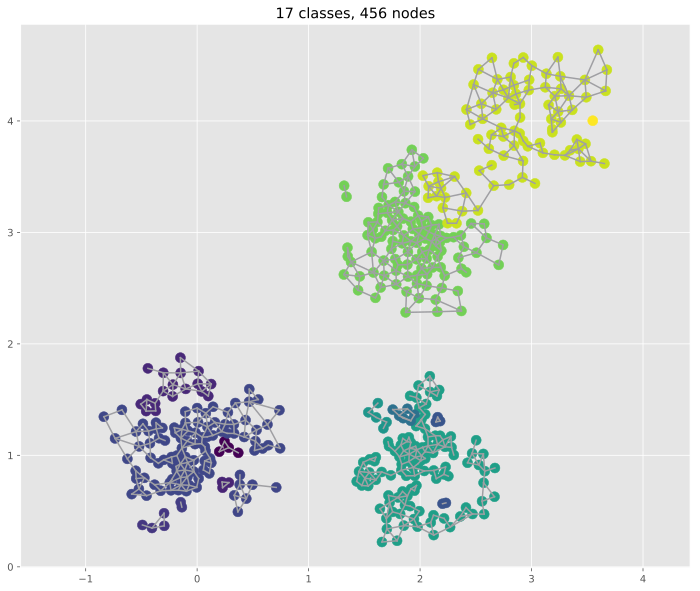

In [31]:
params = {
    'c1': 0.001,
    'c2': 1,
    'learning_step': 100,
    'max_age': 20,
    'forget': False,
    'strong_period_condition': False, 
    'strong_merge_condition': True,  # remove later
    'adaptive_noise_removal': False,
    'logging_level': "info", 
    'full_logging_info': False
}
nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(**params)

plotter = Plotter(nn)

nn.fit(samples['samples'])
nn._remove_noise()
plotter.display_info(plot=True, separate_show=False, log=False, annotate=False)